In [45]:
# install needed packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from scipy.stats import linregress

ImportError: cannot import name 'arrange' from 'numpy' (Z:\Python\lib\site-packages\numpy\__init__.py)

<center><font size="+2">Importing and inspecting the data</font></center>

In [3]:
#importing NA Climate data 1910-2020, data from https://www.ncdc.noaa.gov/cag/global/time-series/northAmerica/land/ytd/12/1910-2020

climate_data = pd.read_csv("ClimateData.csv")

In [4]:
climate_data.head()

,Year,Value
0,1910,-0.12
1,1911,-0.40
2,1912,-0.74
3,1913,-0.68
4,1914,-0.44


In [6]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    111 non-null    int64  
 1   Value   111 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


In [7]:
climate_data.describe()

,Year,Value
count,111.000000,111.000000
mean,1965.000000,0.183423
std,32.186954,0.616939
min,1910.000000,-1.300000
25%,1937.500000,-0.285000
50%,1965.000000,0.130000
75%,1992.500000,0.520000
max,2020.000000,1.930000


In [60]:
temperature = climate_data['Value']
year = climate_data['Year']

In [65]:
#locating index of the maximum temperature and minimum temperature

max_index = temperature.idxmax(axis=0)
min_index = temperature.idxmin(axis=0)

In [68]:
#returning the year and temp associated with the max and min

max_year = year[max_index]
min_year = year[min_index]

max_temp = temperature[max_index]
min_temp = temperature[min_index]

In [70]:
print(f'The minimum temperature was {min_temp} in {min_year}.')

The minimum temperature was -1.3 in 1917.


In [71]:
print(f'The minimum temperature was {max_temp} in {max_year}.')

The minimum temperature was 1.93 in 2016.


In [36]:
#creating trend line for data

slope, intercept, r_value, p_value, std_err = linregress(climate_data['Year'], climate_data['Value'])

In [40]:
start = 1910*slope + intercept

In [41]:
end = 2020*slope + intercept

In [47]:
trend = np.arange(start, end, slope)

In [49]:
trend.shape

(111,)

In [50]:
trend

array([-0.52448681, -0.51161571, -0.49874462, -0.48587352, -0.47300243,
       -0.46013133, -0.44726024, -0.43438914, -0.42151805, -0.40864695,
       -0.39577586, -0.38290476, -0.37003367, -0.35716257, -0.34429148,
       -0.33142038, -0.31854929, -0.30567819, -0.2928071 , -0.279936  ,
       -0.26706491, -0.25419381, -0.24132272, -0.22845162, -0.21558053,
       -0.20270943, -0.18983834, -0.17696724, -0.16409614, -0.15122505,
       -0.13835395, -0.12548286, -0.11261176, -0.09974067, -0.08686957,
       -0.07399848, -0.06112738, -0.04825629, -0.03538519, -0.0225141 ,
       -0.009643  ,  0.00322809,  0.01609919,  0.02897028,  0.04184138,
        0.05471247,  0.06758357,  0.08045466,  0.09332576,  0.10619685,
        0.11906795,  0.13193904,  0.14481014,  0.15768123,  0.17055233,
        0.18342342,  0.19629452,  0.20916561,  0.22203671,  0.2349078 ,
        0.2477789 ,  0.26064999,  0.27352109,  0.28639218,  0.29926328,
        0.31213437,  0.32500547,  0.33787656,  0.35074766,  0.36

In [56]:
#determining incremental increase per year

slope

0.012871095121095126

<center><font size="+2">Plotting the chart</font></center>

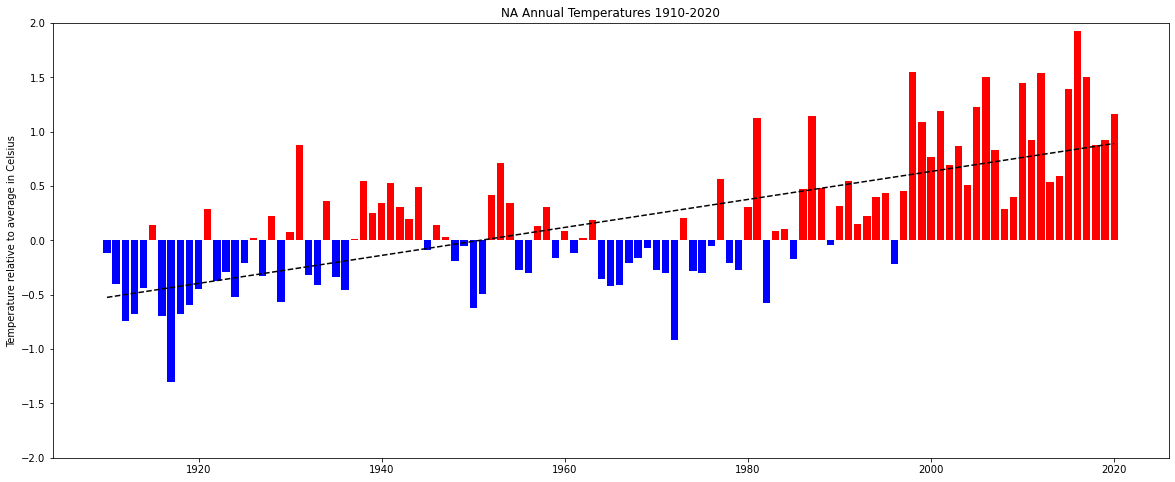

In [57]:
mask1 = temperature < 0
mask2 = temperature >= 0

figure(figsize=(20,8))
plt.bar(year[mask1], temperature[mask1], align='center', color='blue')
plt.bar(year[mask2], temperature[mask2], align='center', color='red')
plt.plot(year, trend, "k--")
plt.bar
plt.ylim(-2,2)
plt.ylabel('Temperature relative to average in Celsius')
plt.title('NA Annual Temperatures 1910-2020')

plt.show()